# SVM x Decision Trees x Random Forest Performance Comparison

## Dataset Description

In [1]:
import pandas as pd

data = pd.read_csv('data/onlinefoods.csv')
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,560010,Yes,Positive


In [2]:
data.describe()

,Age,Family size,Pin code
count,388.000000,388.000000,388.000000
mean,24.628866,3.280928,560040.113402
std,2.975593,1.351025,31.399609
min,18.000000,1.000000,560001.000000
25%,23.000000,2.000000,560010.750000
50%,24.000000,3.000000,560033.500000
75%,26.000000,4.000000,560068.000000
max,33.000000,6.000000,560109.000000


## Outlier Detection
IQR outlier detection for continuous columns


Outliers detected using IQR method:
Series([], Name: Age, dtype: int64)


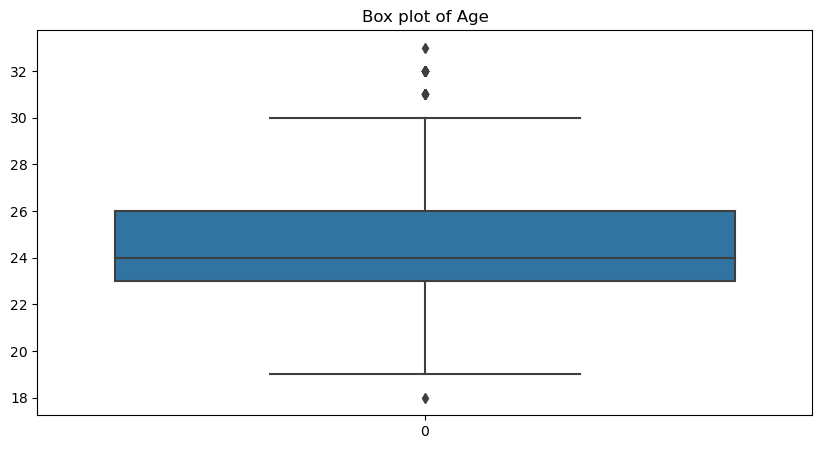

In [3]:
# Outlier Detection
import numpy as np
from scipy.stats import zscore

# Select the column you want to analyze
column_name = 'Age'  # replace with the actual column name
selected_data = data[column_name]

# IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.05)
    Q3 = data.quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Detect outliers using both methods
outliers_iqr = detect_outliers_iqr(selected_data)

# Print outliers
print("\nOutliers detected using IQR method:")
print(outliers_iqr)

# Visualize outliers using a box plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(selected_data)
plt.title(f'Box plot of {column_name}')
plt.show()


## Binning and Label Encoding
Data is binned to be used for feature selection, since Chi Square Test and Cramer's V requires the columns to be categorical

In [4]:
# Manually bin columns
binned_age = pd.cut(data["Age"],
            bins=[17, 22, 26, 29, 34],
            labels=['1', '2', '3', '4'])

binned_pinCode =  pd.cut(data["Pin code"],
            bins=[560000, 560025, 560050, 560075, 560100, 560125],
            labels=['1', '2', '3', '4', '5'])


# Label encode all columns except manually binned columns
from library.bin import label_encode_all
data = label_encode_all(data, exclude_columns=['Age', 'Pin code'])


# Replace the original columns
data['Age'] = binned_age
data['Pin code'] = binned_pinCode

# Show new data
data.head()


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Pin code,Output,Feedback
0,1,0,2,3,4,2,3,1,1,1
1,2,0,2,3,2,0,2,1,1,1
2,1,1,2,3,2,2,2,1,1,0
3,1,0,2,3,4,0,5,1,1,1
4,1,1,2,3,2,2,3,1,1,1


## Feature Selection

### X vs X Feature Selection Using Cramer's V

Cramér's V is a measure of association between two categorical variables. It's based on the chi-square statistic and ranges from 0 to 1, with 0 indicating no association and 1 indicating a perfect association.

Phi and Cramer's V Coefficient • *source: ResearchGate*
- > 0.25 - Very Strong
- > 0.15 - Strong
- > 0.10 - Moderate
- > 0.05 - Weak
- > 0 - No or Very weak


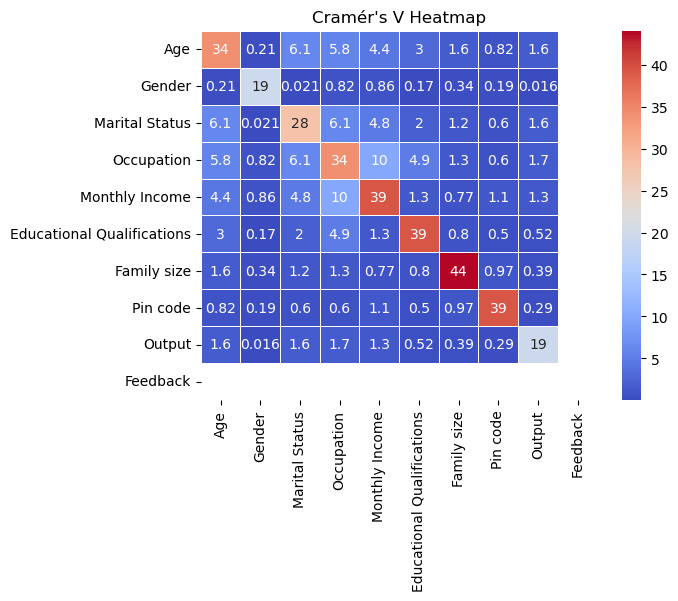

({('Family size', 'Family size'): 44.04543109109047,
  ('Pin code', 'Pin code'): 39.39543120718442,
  ('Monthly Income', 'Monthly Income'): 39.395431207184416,
  ('Occupation', 'Occupation'): 34.117444218463966,
  ('Marital Status', 'Marital Status'): 27.856776554368242},
 Empty DataFrame
 Columns: []
 Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
 
 [388 rows x 0 columns])

In [5]:
from library.feature_selection import cramers_v_analysis
cramers_v_analysis(data, target_column='Feedback', threshold=0.25, top_n=5, plot=True, figsize=None)